In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('employee.csv')

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
df.rename(columns={'timeSpent.company':'years'}, inplace=True)

In [6]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,years,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [7]:
df['workAccident'].unique()

array([0, 1])

In [8]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [9]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
df.tail()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,years,workAccident,left,promotionInLast5years,dept,salary
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low
14998,0.77,0.83,6,271,3,0,0,0,support,low


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   years                  14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
years                    0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [14]:
df.duplicated().sum()

3008

## Data contains huge amount of duplicate values

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [19]:
df.shape

(11991, 10)

## Indepth Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   years                  11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [18]:
df['satisfactoryLevel'].head()

0    0.38
1    0.80
2    0.11
3    0.37
4    0.41
Name: satisfactoryLevel, dtype: float64

<Axes: xlabel='satisfactoryLevel', ylabel='Count'>

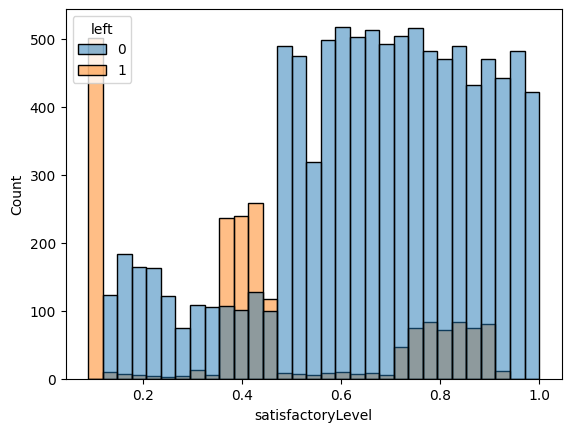

In [21]:
sns.histplot(data=df, x='satisfactoryLevel', hue='left')

1. People with lower satisfaction level are showing more attrition rate.

In [22]:
# lastEvaluation

In [23]:
df['lastEvaluation'].head()

0    0.53
1    0.86
2    0.88
3    0.52
4    0.50
Name: lastEvaluation, dtype: float64

<Axes: xlabel='lastEvaluation', ylabel='Count'>

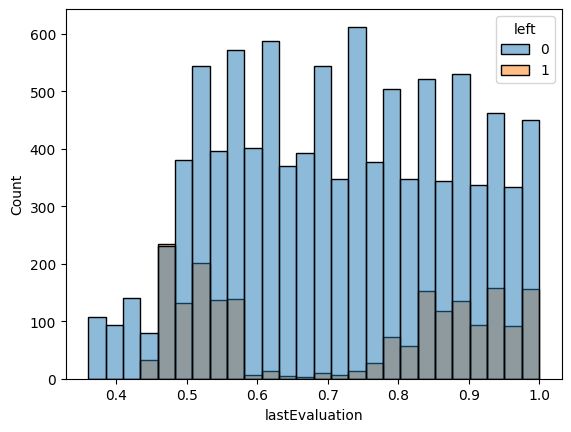

In [24]:
sns.histplot(data=df, x='lastEvaluation', hue='left')

1. People with less evaluation scores (0.4 to 0.6) are showing high attrition rate.
2. People with high scores (0.8 to 1.0) are showing high attrition rate.
3. People with high evaluation ratings should be retained as they can plan an important part in the comapny's progress.

In [25]:
# numberOfProjects

In [26]:
df['numberOfProjects'].value_counts()

numberOfProjects
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

<Axes: xlabel='numberOfProjects', ylabel='count'>

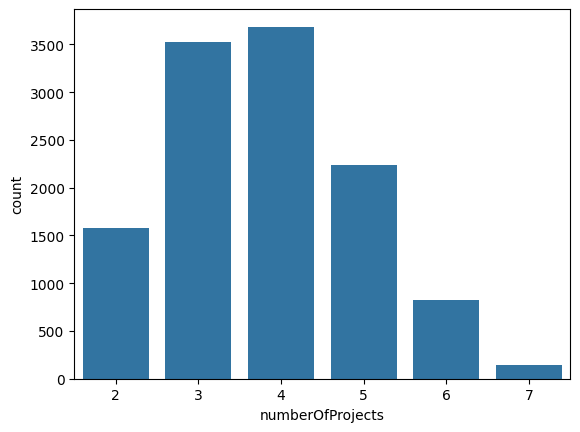

In [30]:
sns.countplot(data=df, x='numberOfProjects')

### Most of the people in the company have worked on 3 or 4 number of projects

<Axes: xlabel='numberOfProjects', ylabel='count'>

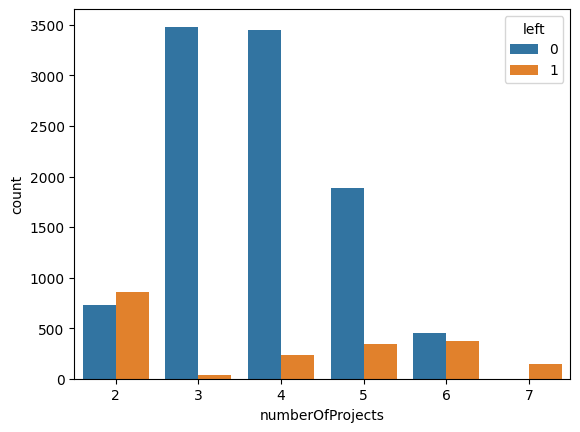

In [31]:
sns.countplot(data=df, x='numberOfProjects', hue='left')


1. People who have been underworking (2 projects) or overworked (6 or 7 projects) are showing high attrition rate.

2. People with average number of projects (3 or 4 projects) are showing less attrition rate.

3. Right balance of number of projects is required to retain employees



In [32]:
# years

In [34]:
df['years'].value_counts()

years
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

<Axes: xlabel='years', ylabel='count'>

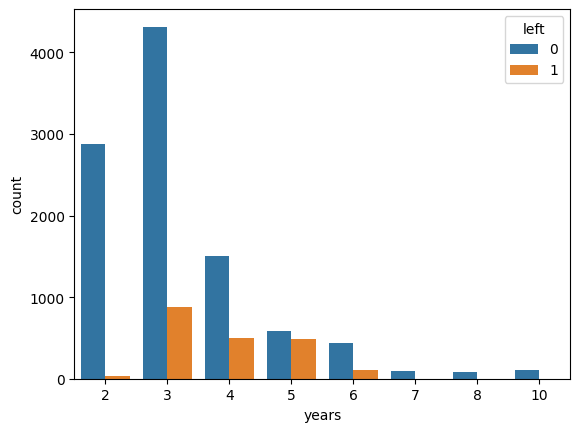

In [35]:
sns.countplot(data=df, x='years', hue='left')

1. People with more experience (7, 8 and 10 years of experience) are not leaving the company. Which is a good sign.

2. People with 3, 4 and 5 years of experience are showing high attrition rate. And this needs to be addressed as soon as possible as these are valuable resources.

In [36]:
# workAccident

In [37]:
df['workAccident'].value_counts()

workAccident
0    10141
1     1850
Name: count, dtype: int64

<Axes: xlabel='workAccident', ylabel='count'>

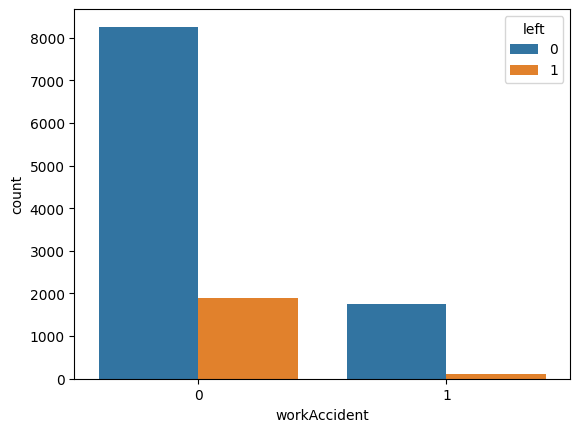

In [39]:
sns.countplot(data=df, x='workAccident', hue='left')

1. Work accidents are not playing any part in the high attrition rate in the company.

2. The company is doing very good to address the work accidents

In [40]:
# promotionInLast5years

In [41]:
df['promotionInLast5years'].value_counts()

promotionInLast5years
0    11788
1      203
Name: count, dtype: int64

In [42]:
df.shape

(11991, 10)

In [43]:
203 / 11991 *100

1.6929363689433743

### In the last 5 years only 1.69 percent people have been promoted. This is a matter of concern and higher authorities should look into it.

<Axes: xlabel='promotionInLast5years', ylabel='count'>

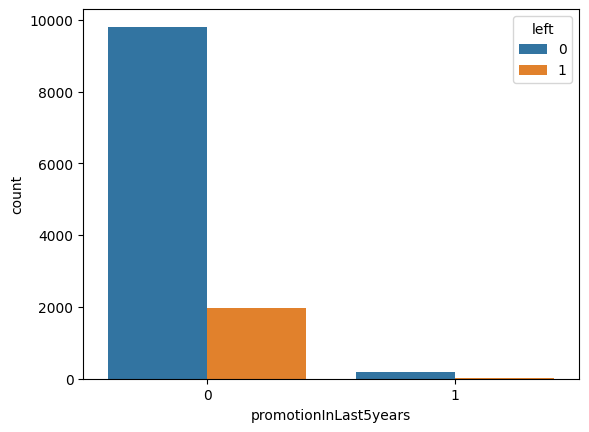

In [44]:
sns.countplot(data=df, x='promotionInLast5years', hue='left')

1. People who have not been promoted from the last 5 years are showing high attrition rates.

<Axes: xlabel='promotionInLast5years', ylabel='years'>

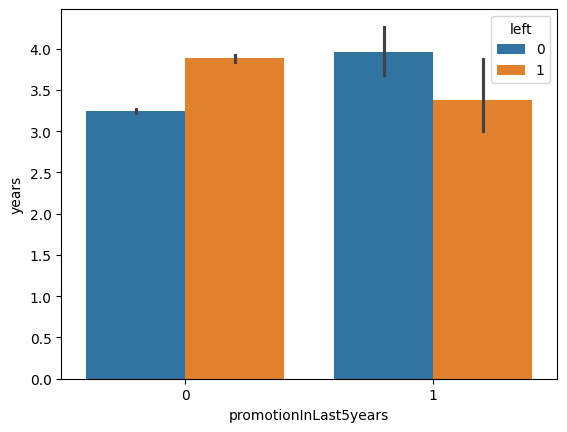

In [46]:
sns.barplot(data=df, x='promotionInLast5years', y='years', hue='left')

In [47]:
# dept

In [48]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [50]:
df['dept'].nunique()

10

<Axes: xlabel='dept', ylabel='count'>

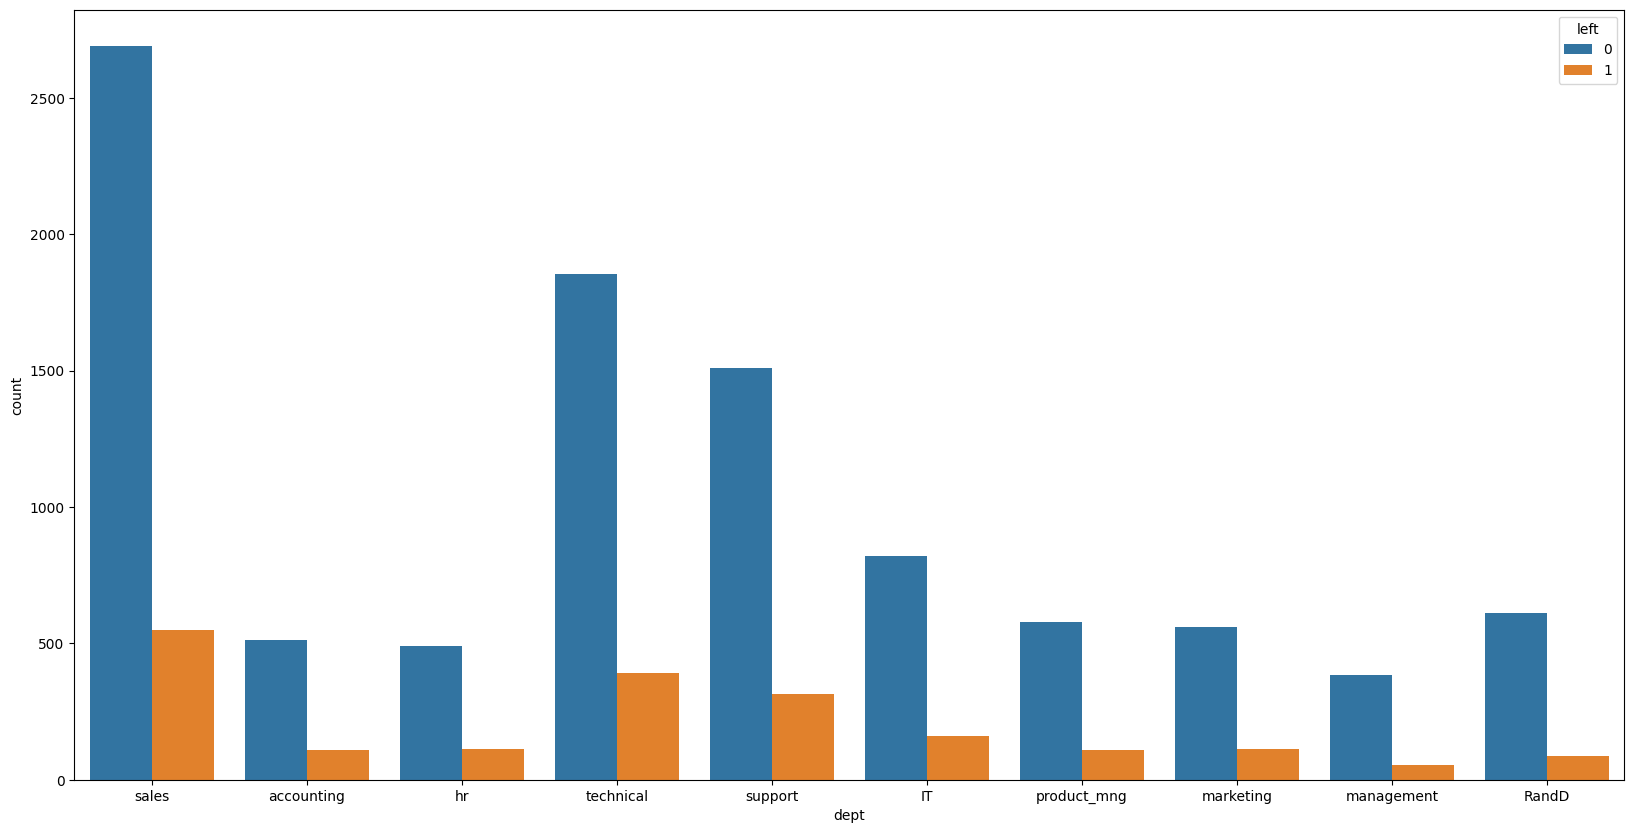

In [52]:
plt.figure(figsize=(20,10))

sns.countplot(data=df, x='dept', hue='left')

In [71]:
# len(df[(df['dept']=='sales') & (df['left']==1]))




len(df[ (df['dept']=='sales') & (df['left']==1)  ])

550

In [73]:

round(len(df[ (df['dept']=='sales') & (df['left']==1)  ]) / len(df[df['dept']=='sales']) *100,    2)

16.98

In [76]:
for col in df['dept'].unique():

  print('Arrtition rate in', col, 'is: ')
  print(round(len(df[ (df['dept']==col) & (df['left']==1)  ]) / len(df[df['dept']==col]) *100,   2))
  print('---'*50)

Arrtition rate in sales is: 
16.98
------------------------------------------------------------------------------------------------------------------------------------------------------
Arrtition rate in accounting is: 
17.55
------------------------------------------------------------------------------------------------------------------------------------------------------
Arrtition rate in hr is: 
18.8
------------------------------------------------------------------------------------------------------------------------------------------------------
Arrtition rate in technical is: 
17.38
------------------------------------------------------------------------------------------------------------------------------------------------------
Arrtition rate in support is: 
17.13
------------------------------------------------------------------------------------------------------------------------------------------------------
Arrtition rate in IT is: 
16.19
-------------------------------

1. Not a single department is very happy with the management.

2. All the departmnets are showing, more or less, the same percent attrition.

In [53]:
# salary

In [54]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<Axes: xlabel='salary', ylabel='count'>

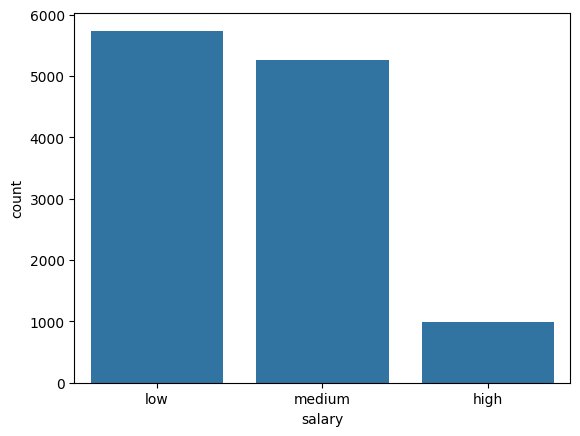

In [56]:
sns.countplot(data=df, x='salary')

<Axes: xlabel='salary', ylabel='count'>

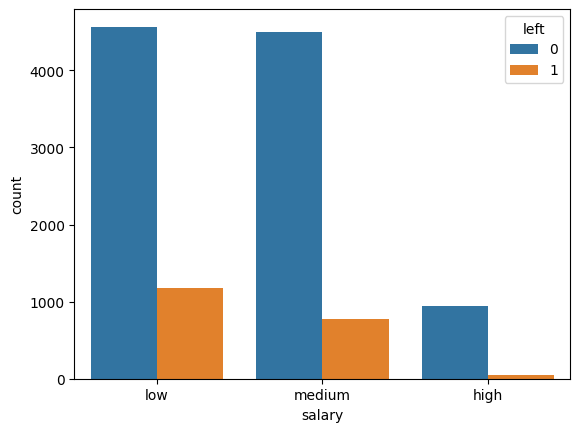

In [57]:
sns.countplot(data=df, x='salary', hue='left')


1. People with high salary are very less in the company.

2. People with high salary are showing very less attrition rate.

3. People with low and medium salary are showing high attrition rate. This needs to be addressed.

<Axes: xlabel='years', ylabel='salary'>

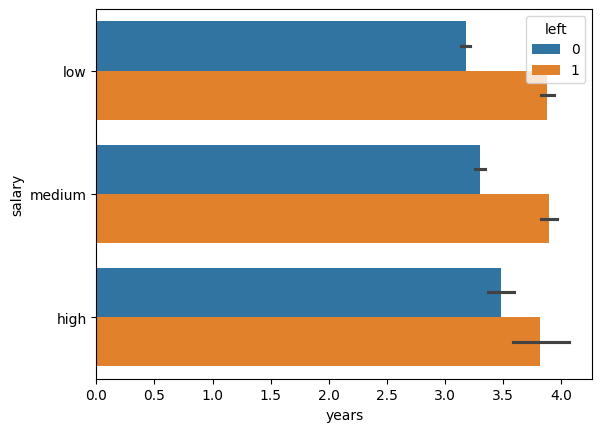

In [59]:
sns.barplot(data=df, x='years', y='salary', hue='left')

In [60]:
df[df['years']>6]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,years,workAccident,left,promotionInLast5years,dept,salary
7304,0.49,0.67,2,190,8,0,0,0,marketing,medium
7305,0.81,0.55,4,217,8,0,0,0,accounting,medium
7306,0.62,0.91,3,269,8,0,0,0,support,medium
7351,0.73,0.84,3,216,8,0,0,0,management,medium
7352,0.48,0.74,2,271,8,1,0,0,management,medium
...,...,...,...,...,...,...,...,...,...,...
13817,0.87,0.82,4,198,7,0,0,0,sales,medium
13929,0.55,0.40,3,139,8,0,0,1,hr,medium
14173,0.90,0.89,4,254,7,0,0,0,product_mng,low
14610,0.96,0.60,3,160,10,0,0,0,support,medium


<Axes: xlabel='salary', ylabel='count'>

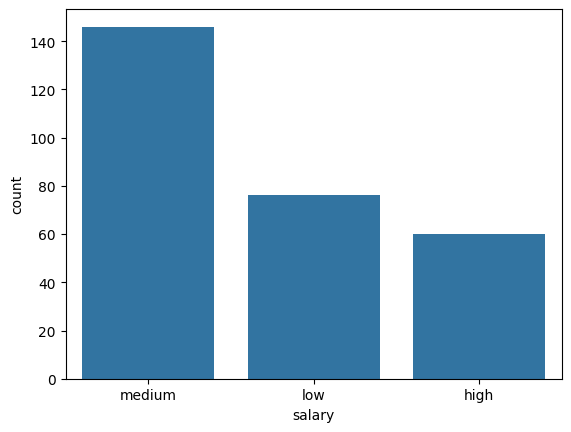

In [61]:
sns.countplot(data=df[df['years']>6],  x='salary')

### Even the most experience group of employees ( 7, 8 and 10 years) are mostly paid medium range of salary.

<Axes: xlabel='promotionInLast5years', ylabel='count'>

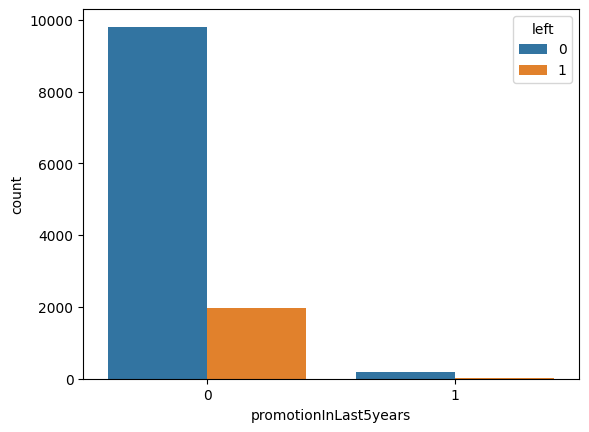

In [62]:
sns.countplot(data=df, x='promotionInLast5years',hue='left')

In [63]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,years,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
